In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yg821jf8611_tn_nashville_2020_04_01.csv.zip to yg821jf8611_tn_nashville_2020_04_01.csv (1).zip


In [30]:
import pandas as pd
df= pd.read_csv('yg821jf8611_tn_nashville_2020_04_01.csv.zip')
print(df.shape)
print(df.info())
print(df.columns)


<ipython-input-30-e8b40b591d3a>:2: DtypeWarning:

Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.



(3092351, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092351 entries, 0 to 3092350
Data columns (total 42 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   raw_row_number                  object 
 1   date                            object 
 2   time                            object 
 3   location                        object 
 4   lat                             float64
 5   lng                             float64
 6   precinct                        object 
 7   reporting_area                  float64
 8   zone                            object 
 9   subject_age                     float64
 10  subject_race                    object 
 11  subject_sex                     object 
 12  officer_id_hash                 object 
 13  type                            object 
 14  violation                       object 
 15  arrest_made                     object 
 16  citation_issued                 object 
 17  warning_issue

In [31]:
df.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,52.0,...,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,25.0,...,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,NaN,N,True,True,False,False,False,False,False


#Data cleaning

In [32]:
import pandas as pd
import numpy as np

# Convert 'nan' to False for specific columns
boolean_columns = [
    'contraband_found', 'contraband_drugs', 'contraband_weapons',
    'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle',
    'arrest_made', 'citation_issued', 'warning_issued'
]

for col in boolean_columns:
    df[col] = df[col].fillna(False)

# Remove redundant columns
redundant_columns = [
    'raw_verbal_warning_issued', 'raw_written_warning_issued',
    'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
    'raw_suspect_ethnicity', 'raw_driver_searched', 'raw_passenger_searched',
    'raw_search_consent', 'raw_search_arrest', 'raw_search_warrant',
    'raw_search_inventory', 'raw_search_plain_view'
]

df1 = df.drop(columns=redundant_columns)

# Remove columns that are entirely NaN
df1 = df1.dropna(axis=1, how='all')

# Remove columns that have the same value for all rows
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
df1 = df1.drop(columns=constant_columns)

# Reset the index if needed
df1 = df1.reset_index(drop=True)

# Display information about the cleaned dataframe
print(df1.info())
print(df1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092351 entries, 0 to 3092350
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   raw_row_number              object 
 1   date                        object 
 2   time                        object 
 3   location                    object 
 4   lat                         float64
 5   lng                         float64
 6   precinct                    object 
 7   reporting_area              float64
 8   zone                        object 
 9   subject_age                 float64
 10  subject_race                object 
 11  subject_sex                 object 
 12  officer_id_hash             object 
 13  violation                   object 
 14  arrest_made                 bool   
 15  citation_issued             bool   
 16  warning_issued              bool   
 17  outcome                     object 
 18  contraband_found            bool   
 19  contraband_drugs     

In [33]:
df1.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,27.0,...,False,False,False,False,False,False,NaN,investigative stop,TN,NaN
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,18.0,...,False,False,False,False,False,False,NaN,moving traffic violation,TN,NaN
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,52.0,...,False,False,False,False,False,False,NaN,vehicle equipment violation,TN,NaN
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,25.0,...,False,False,False,False,False,False,NaN,registration,TN,NaN
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,False,False,True,True,True,probable cause,vehicle equipment violation,TN,NaN


In [34]:
df1.shape

(3092351, 29)

In [35]:
df2=df1.dropna()
df2.shape

(22603, 29)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22603 entries, 26 to 3092292
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   raw_row_number              22603 non-null  object 
 1   date                        22603 non-null  object 
 2   time                        22603 non-null  object 
 3   location                    22603 non-null  object 
 4   lat                         22603 non-null  float64
 5   lng                         22603 non-null  float64
 6   precinct                    22603 non-null  object 
 7   reporting_area              22603 non-null  float64
 8   zone                        22603 non-null  object 
 9   subject_age                 22603 non-null  float64
 10  subject_race                22603 non-null  object 
 11  subject_sex                 22603 non-null  object 
 12  officer_id_hash             22603 non-null  object 
 13  violation                   22603

In [40]:
df2.count()

raw_row_number                22603
date                          22603
time                          22603
location                      22603
lat                           22603
lng                           22603
precinct                      22603
reporting_area                22603
zone                          22603
subject_age                   22603
subject_race                  22603
subject_sex                   22603
officer_id_hash               22603
violation                     22603
arrest_made                   22603
citation_issued               22603
warning_issued                22603
outcome                       22603
contraband_found              22603
contraband_drugs              22603
contraband_weapons            22603
frisk_performed               22603
search_conducted              22603
search_person                 22603
search_vehicle                22603
search_basis                  22603
reason_for_stop               22603
vehicle_registration_state  

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
# 2. Predict Stop Outcome
# Prepare the data
X = df2[['lat', 'lng', 'subject_age', 'search_conducted', 'frisk_performed',
         'subject_race', 'subject_sex', 'violation', 'reason_for_stop']]  # Add the missing columns here
y = df2['arrest_made']

# Encode categorical variables
X = pd.get_dummies(X, columns=['subject_race', 'subject_sex', 'violation', 'reason_for_stop'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))


              precision    recall  f1-score   support

       False       0.68      0.77      0.72      2858
        True       0.49      0.38      0.43      1663

    accuracy                           0.62      4521
   macro avg       0.58      0.57      0.57      4521
weighted avg       0.61      0.62      0.61      4521

[[2194  664]
 [1032  631]]
                               feature  importance
0                                  lat    0.335320
1                                  lng    0.335130
2                          subject_age    0.251934
4                      frisk_performed    0.018605
6                   subject_race_black    0.006637
10                  subject_race_white    0.006203
12                    subject_sex_male    0.005270
11                  subject_sex_female    0.005092
7                subject_race_hispanic    0.004685
22  reason_for_stop_investigative stop    0.004354


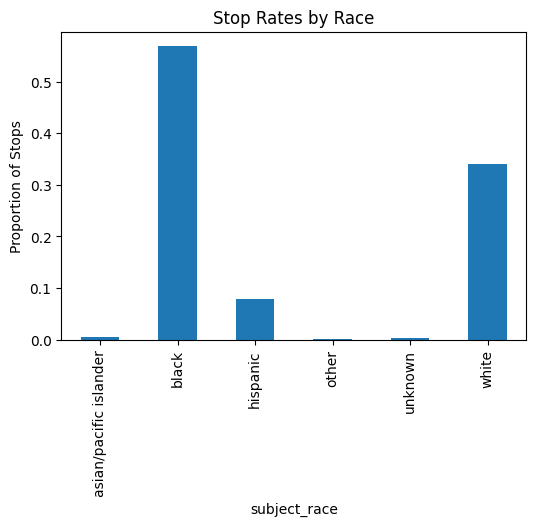

<ipython-input-50-54bfc44cf1c8>:10: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-50-54bfc44cf1c8>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



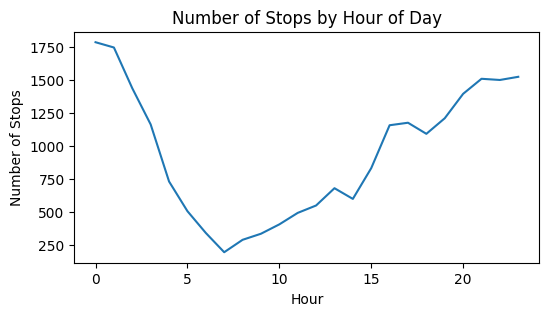

In [50]:
# 3. Additional Analysis: Racial Disparity in Stops
stop_rates = df2.groupby('subject_race').size() / len(df2)
plt.figure(figsize=(6,4))
stop_rates.plot(kind='bar')
plt.title('Stop Rates by Race')
plt.ylabel('Proportion of Stops')
plt.show()

# 4. Time Analysis
df2['hour'] = pd.to_datetime(df2['time']).dt.hour
hourly_stops = df2.groupby('hour').size()
plt.figure(figsize=(6,3))
hourly_stops.plot(kind='line')
plt.title('Number of Stops by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Stops')
plt.show()

In [ ]:
# 1. Geospatial Analysis

# Create the map
fig = px.scatter_mapbox(df2,
                        lat="lat",
                        lon="lng",
                        hover_name="reason_for_stop",
                        hover_data=["date", "time", "subject_race", "outcome"],
                        zoom=10,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()